In [1]:
zomato_delhi = pd.read_csv('DelhiNCR Restaurants.csv')

<IPython.core.display.Javascript object>

In [2]:
df = zomato_delhi.copy()

In [3]:
df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_For2,Known_For22
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844,https://www.zomato.com/ncr/rustoms-ito-new-delhi,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",9.1991E+11,28.638167,77.240472,NaN,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37,https://www.zomato.com/ncr/cafe-lota-pragati-m...,"National Crafts Museum, Gate 2, Bhairon Marg, ...",9.17839E+11,28.613429,77.242471,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0,https://www.zomato.com/ncr/dum-pukht-itc-maury...,"ITC Maurya, Chanakyapuri, New Delhi",9.11146E+11,28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NaN
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238,https://www.zomato.com/ncr/burma-burma-dlf-cyb...,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",9.11244E+11,28.494464,77.088532,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0,https://www.zomato.com/ncr/the-big-chill-khan-...,"68-A, Khan Market, New Delhi",9.11142E+11,28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ..."


In [4]:
# Shape of the dataset 
df.shape

(1965, 15)

In [5]:
# Information about Dataset Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        1965 non-null   object 
 1   Category               1965 non-null   object 
 2   Pricing_for_2          1965 non-null   int64  
 3   Locality               1965 non-null   object 
 4   Dining_Rating          1965 non-null   float64
 5   Dining_Review_Count    1965 non-null   int64  
 6   Delivery_Rating        1563 non-null   float64
 7   Delivery_Rating_Count  1965 non-null   int64  
 8   Website                1965 non-null   object 
 9   Address                1965 non-null   object 
 10  Phone_No               1965 non-null   object 
 11  Latitude               1965 non-null   float64
 12  Longitude              1965 non-null   float64
 13  Known_For2             1560 non-null   object 
 14  Known_For22            1124 non-null   object 
dtypes: f

In [6]:
# Renaming the columns *Known_For2 & *Known_For22 
df.rename(columns= {'Known_For2':'Speciality' , 'Known_For22':'Feedback'}, inplace=True)

### Dropping the Phone No & Website feature.

In [7]:
df.drop(['Phone_No', 'Website'], axis=1, inplace=True)

<IPython.core.display.Javascript object>

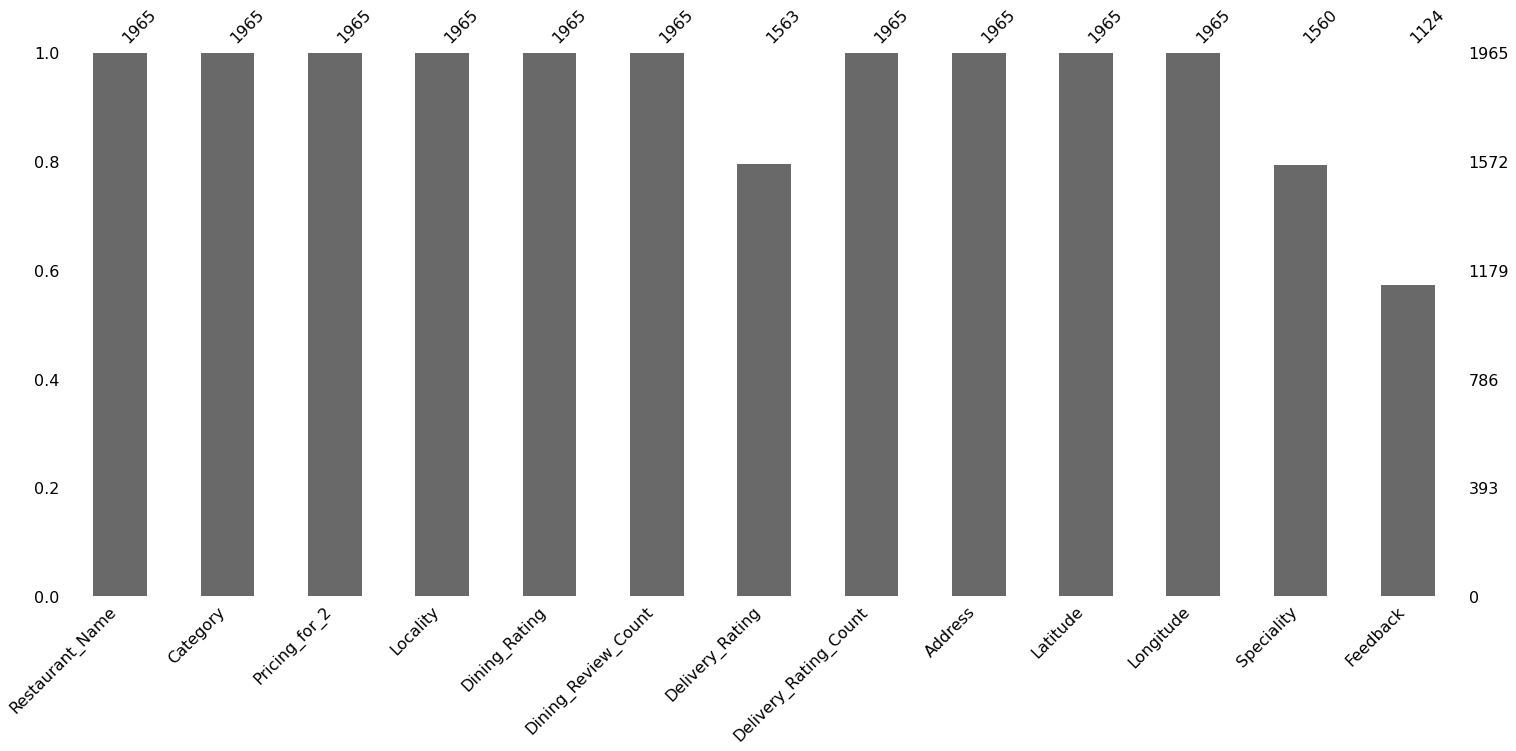

In [8]:
# Checking the missing values
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno

msno.bar(df)

### Decoding missing values in Delivery rating feature

In [9]:
df[df.Delivery_Rating_Count == 0 ]

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Address,Latitude,Longitude,Speciality,Feedback
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0,"ITC Maurya, Chanakyapuri, New Delhi",28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NaN
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0,"68-A, Khan Market, New Delhi",28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ..."
18,The Big Chill Cakery,"Bakery, Desserts",400,"DLF Mall of India, Sector 18, Noida, Noida",4.8,884,NaN,0,"Ground Floor, DLF Mall Of India, Sector 18, Noida",28.567882,77.320971,"Triple Chocolate Cheesecake, Irish Tiramisu, M...","Pretty Decor, Behavior, More Variety, Packed o..."
23,Chaina Ram Sindhi Confectioners,"Mithai, Street Food",350,"Chandni Chowk, New Delhi",4.7,1155,NaN,0,"6499, Fathepuri Chowk, Chandni Chowk, New Delhi",28.656595,77.223251,"Sev Badam, Sohan Halwa, Pinni, Malai Ghewar, P...","Sweetshop+Restaurant, Breakfast, Owner, Amazin..."
24,Sevilla - The Claridges,"Spanish, Italian, Desserts",4500,"The Claridges, Aurangzeb Road, New Delhi",4.7,1630,NaN,0,"The Claridges, 12, Dr. A.P.J. Abdul Kalam Road...",28.600335,77.216924,"Patata Bravas, Corn Fed Chicken, Date Night, D...","Romantic Getaway, Romantic Setting, Candle Lig..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,Polo Lounge - Hyatt Regency,Finger Food,2500,"Hyatt Regency, Bhikaji Cama Place, New Delhi",3.9,89,NaN,0,"Hyatt Regency, Bhikaji Cama Place, New Delhi",28.568443,77.186974,"Extensive Mocktail Menu, Vintage Decor, Live S...",NaN
1937,Cake-O-Licious,Bakery,400,"Rajouri Garden, New Delhi",3.9,53,NaN,0,"Rajouri Garden, New Delhi",28.640402,77.119902,"Highly Customizable Cakes, Great Taste, Presen...",NaN
1956,Playboy Tap,"European, Continental",1600,"Global Foyer Mall, Golf Course Road, Gurgaon",3.9,265,NaN,0,"Global Foyer Mall, Sector 43, Golf Course Road...",28.464459,77.094758,"Cigar Roll, Chicken Tikka Pizza, Crispy Corn, ...","Live Entertainment, Good Bartenders, Beautiful..."
1957,Ricks Bar - The Taj Mahal Hotel,"Malaysian, Thai",4200,"The Taj Mahal Hotel, Mansingh Road, New Delhi",3.9,95,NaN,0,"The Taj Mahal Hotel, 1, Mansingh Road, New Delhi",28.604976,77.224217,NaN,NaN


### Even the Restaurants having very high dining rating have 0 Delivery Rating count which inturn results in missing values in Delivery rating feature.This might be because these restaurants have tied-up with zomato recently(ITC maurya announced their tie-up with zomato for delivery services in late 2020 ).

## **************************************************************************

## Imputing the missing values

In [10]:
# Imputing the missing values  in Delivery Rating feature.
df['Delivery_Rating'].fillna('New', inplace=True)

In [11]:
# Creating a new feature to get a better understanding of missing data while modelling.
df['Missing_Delivery_Rating'] = np.where(df['Delivery_Rating'] == 'New' , 1, 0)

<IPython.core.display.Javascript object>

In [12]:
low_delivery_count = df[(df['Delivery_Rating_Count'] != 0)  &  (df['Delivery_Rating'] == 'New')]
low_delivery_count

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Address,Latitude,Longitude,Speciality,Feedback,Missing_Delivery_Rating
8,Kuremal Mohan Lal Kulfi Wale,"Ice Cream, Desserts",200,"Chawri Bazar, New Delhi",4.9,1120,New,5,"526, Kucha Pati Ram, Bazar Sita Ram, Near Chaw...",28.647662,77.226991,"Orange Kulfi, Jamun Kulfi, Mixed Fruit, Fruit ...","Bank for the Buck, Totally Worth it, Table Ser...",1
35,Threesixtyone Degrees - The Oberoi,"Asian, Continental, North Indian, Mughlai, Des...",5500,"The Oberoi, Udyog Vihar, Gurgaon",4.7,1019,New,1,"443, Phase 5, Udyog Vihar, Gurgaon",28.501983,77.086985,"Buffet, Chocolate Cake, Thai Curry, Salads, Vi...","Outside Deck, Poolside View, Sophisticated, Am...",1
48,Plum By Bent Chair,"Chinese, Japanese, Thai, Asian, Beverages",2200,"Aerocity, New Delhi",4.6,2402,New,1,"Ground Floor, Worldmark 2, Aerocity, New Delhi",28.551540,77.122704,"Elderflower Cocktail, Thai Mojito, Cappuccino ...","Great Taste Value for Money, Good Quality with...",1
49,Kiyan - The Roseate,"Thai, European, North Indian, Pizza, Salad",5500,"The Roseate, Kapashera, New Delhi",4.6,1124,New,2,"The Roseate, 21st Milestone, Samalkha, NH 8, K...",28.525118,77.100226,NaN,NaN,1
53,Clock Tower,"North Indian, Asian, Beverages, Fast Food",2500,"Golf Course Road, Gurgaon",4.6,1300,New,9,"Near Rapid Metro Pillar 141, Golf Course Road,...",28.448130,77.100745,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,Deepak Vaishno Dhaba,North Indian,400,"Jail Road, New Delhi",3.9,138,New,1,"Stalls A-F, DDA Market, Jail Road, New Delhi",28.631387,77.098122,"Achari Chaap, Malai Chaap, Shahi Paneer, Dal M...",NaN,1
1930,Ssence - A Culinary Showcase - The Suryaa New ...,"North Indian, Pizza, Desserts, Fast Food, Past...",3000,"The Suryaa New Delhi, New Friends Colony, New...",3.9,168,New,3,"The Suryaa New Delhi, New Friends Colony, New ...",28.561002,77.269392,"Sophisticated, Live Kitchen, Chef, Great Servi...",NaN,1
1943,Hyde by Plan B,"North Indian, Chinese",1000,"Sector 21, Gurgaon",3.9,237,New,10,"14/3, Old Delhi Gurgaon Road, Near Infocity, S...",28.508292,77.071902,"Crowd, Environment, Good Ambience, Music, Grea...",NaN,1
1950,Hungry La,"North Indian, Fast Food",200,"DLF Phase 3, Gurgaon",3.9,5,New,1,"Shop 3, U51/44, Ground Floor, U Block, DLF Pha...",28.491887,77.093789,NaN,NaN,1


In [13]:
low_delivery_count['Delivery_Rating_Count'].unique()

array([ 5,  1,  2,  9, 10,  6,  7,  3, 15, 17, 16, 13,  4, 12, 11,  8, 19,
       23, 14, 18], dtype=int64)

## The maximum Delivery_Rating_Count is '23' which have null value in Delivery_Rating Feature, this might be because of the reason that there must be some minimum count after which the rating is assigned to the restaurants.

# **

## Imputing missing values in Speciality & Reviews feature

In [14]:
df['Speciality'].fillna('NA', inplace=True)

In [15]:
df['Feedback'].fillna('NA', inplace=True)

In [16]:
df.isnull().sum()

Restaurant_Name            0
Category                   0
Pricing_for_2              0
Locality                   0
Dining_Rating              0
Dining_Review_Count        0
Delivery_Rating            0
Delivery_Rating_Count      0
Address                    0
Latitude                   0
Longitude                  0
Speciality                 0
Feedback                   0
Missing_Delivery_Rating    0
dtype: int64

In [17]:
# Features of an observation having maximum Dining rating
df.loc[df['Dining_Rating'].idxmax()]

Restaurant_Name                                                     Rustom's
Category                   Parsi, Street Food, North Indian, Desserts, Be...
Pricing_for_2                                                           2100
Locality                                                      ITO, New Delhi
Dining_Rating                                                            4.9
Dining_Review_Count                                                     1885
Delivery_Rating                                                          4.4
Delivery_Rating_Count                                                   1844
Address                    Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...
Latitude                                                             28.6382
Longitude                                                            77.2405
Speciality                                                                NA
Feedback                                                                  NA

In [18]:
# Features of an observation having minimum Dining rating
df.loc[df['Dining_Rating'].idxmin()]

Restaurant_Name                                              Bo Tai - Switch
Category                                         Asian, Thai, Chinese, Pizza
Pricing_for_2                                                           2500
Locality                                        Parliament Street, New Delhi
Dining_Rating                                                            3.9
Dining_Review_Count                                                      153
Delivery_Rating                                                          New
Delivery_Rating_Count                                                      0
Address                        19, Ashoka Road, Parliament Street, New Delhi
Latitude                                                              28.621
Longitude                                                            77.2182
Speciality                 Veg Creamy Pasta, Chocolate Pyramid Pastry, Pi...
Feedback                   Good for Families, Parking Space Available, Co...

In [19]:
df.Category.unique()

array(['Parsi, Street Food, North Indian, Desserts, Beverages',
       'Cafe, South Indian, North Indian, Beverages',
       'Mughlai, North Indian, Desserts', ...,
       'Frozen Yogurt, Desserts, Beverages',
       'Mughlai, North Indian, Chinese, Fast Food',
       'Cafe, North Indian, Chinese, Kashmiri, Rolls, Pizza, Beverages'],
      dtype=object)

In [20]:
df.Category.value_counts()

North Indian                                                               88
North Indian, Chinese                                                      39
North Indian, Mughlai                                                      37
Pizza, Fast Food                                                           19
North Indian, Chinese, Fast Food                                           17
                                                                           ..
Cafe, Fast Food, Beverages, Pasta, Pizza, Italian                           1
Street Food, Fast Food, Chinese, North Indian, Desserts, Beverages          1
Mithai, Fast Food, Street Food, North Indian                                1
Beverages, European, Italian, Desserts                                      1
North Indian, Fast Food, Chinese, Italian, Mexican, Beverages, Desserts     1
Name: Category, Length: 1355, dtype: int64

In [21]:
# Top Categories
category_count = []

for v in df.Category.values:
    if isinstance(v,str):
        cat = v.split(',')
        for c in cat:
            category_count.append(c.strip())

In [22]:
pd.Series(category_count).value_counts()

<IPython.core.display.Javascript object>

North Indian     1063
Chinese           775
Beverages         726
Fast Food         605
Desserts          425
                 ... 
Indonesian          1
Mangalorean         1
Portuguese          1
Roast Chicken       1
Frozen Yogurt       1
Length: 90, dtype: int64

## Top 20 categories

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

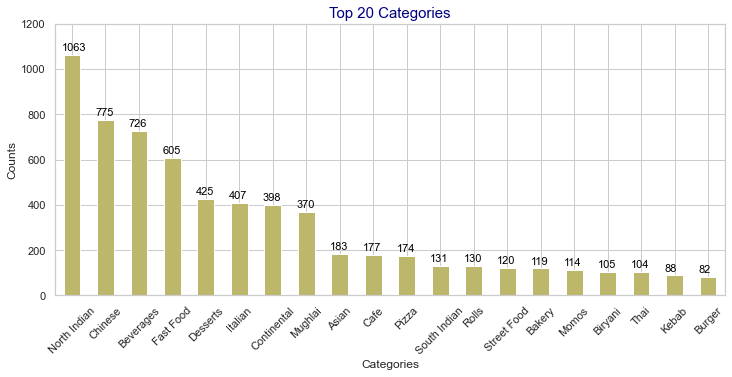

In [23]:
sns.set(style='whitegrid')
ax = pd.Series(category_count).value_counts()[:20].plot(kind='bar', rot=45, figsize=(12,5),color = 'darkkhaki')
plt.title('Top 20 Categories', fontsize=15, color='navy')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.ylim(0,1200)
for idx, val in enumerate(pd.Series(category_count).value_counts()[:20]):
    plt.text(x = idx-0.3, y= val+20, s=val, color='black', fontsize=11)

## Pricing Category

In [24]:
df['Pricing_for_2'].value_counts()

500     238
400     159
600     156
300     132
800     100
700      96
1000     93
1500     79
2000     63
1200     63
1800     58
1600     56
450      51
350      50
1400     45
2500     40
3000     39
1300     37
900      35
200      34
1700     31
550      26
3500     24
1100     23
650      23
1900     22
250      21
2100     19
150      17
2200     17
850      15
4000     12
750      12
4500     11
2300      9
2400      7
5000      6
3200      6
2800      4
5500      4
3800      4
2600      3
100       3
950       3
3600      2
3400      2
3300      2
3100      2
6500      1
6600      1
5100      1
3900      1
4300      1
8000      1
2700      1
4800      1
4200      1
7000      1
2900      1
Name: Pricing_for_2, dtype: int64

In [25]:
label = ['cost<500', '500-1000','1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-4000',
         '4000-5000', 'cost>5000']

df['Cost_for_2']= pd.cut(df['Pricing_for_2'], 
                         bins=[0,500,1000,1500,2000,2500,3000,4000,5000,8000],
                         labels = label)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

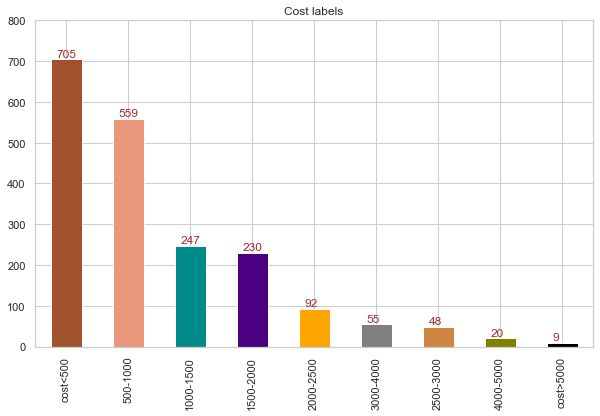

In [26]:
c = ['sienna', 'darksalmon', 'darkcyan', 'indigo', 'orange', 'grey','peru', 'olive', 'black']
ax = df['Cost_for_2'].value_counts().plot(kind='bar', figsize=(10,6), color=c)
plt.title('Cost labels')
plt.ylim(0,800)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.1, p.get_height()+1), va='bottom', color='brown')
plt.show()

### Categorizing Price ranges

In [27]:
def price_range(Pricing_for_2):
    if Pricing_for_2 <= 1000:
        return 'Budget Friendly'
    elif Pricing_for_2 > 1000 and Pricing_for_2 <= 3000:
        return 'Mid Range'
    elif Pricing_for_2 > 3000 and Pricing_for_2 <= 5000:
        return 'Expensive'
    else:
        return 'Elite'

In [28]:
df['price_range_classification']= df.apply(lambda x : price_range(x['Pricing_for_2']), axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

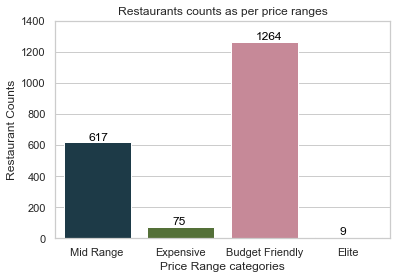

In [29]:
sns.set(style='whitegrid')
ax = sns.countplot(x='price_range_classification', data=df, palette='cubehelix')
plt.title('Restaurants counts as per price ranges')
plt.xlabel('Price Range categories')
plt.ylabel('Restaurant Counts')
plt.ylim(0,1400)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+1), va='bottom', color='black')
plt.show()    

### Dining Rating 

In [30]:
df['Dining_Rating'].value_counts()

4.0    453
4.1    384
3.9    334
4.2    300
4.3    199
4.4    129
4.5     79
4.6     44
4.7     24
4.8     10
4.9      9
Name: Dining_Rating, dtype: int64

### Categorizing the Dining Rating

In [31]:
df['Dining_rating_category']= pd.cut(df['Dining_Rating'], bins =[0, 3.9 , 4.4, 4.9 ],
                                    labels = ['Average', 'Good', 'Excellent'])

<IPython.core.display.Javascript object>

In [32]:
df['Dining_rating_category'].value_counts() 

Good         1465
Average       334
Excellent     166
Name: Dining_rating_category, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

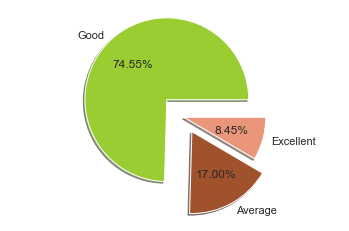

In [33]:
x = df['Dining_rating_category'].value_counts()
color = ['yellowgreen', 'sienna', 'darksalmon']
labels = ['Good', 'Average', 'Excellent']
explode = (0.3,0.2,0)

plt.pie(x, explode= explode, colors = color, labels = labels, autopct = '%1.2f%%', shadow=True)
plt.axis('equal')
plt.show()

### The ratio of the Average restaurants must be reduced.

# ***

### Delivery Rating

In [34]:
df['Delivery_Rating'].value_counts()

New    402
3.9    304
4.0    264
4.1    253
4.2    177
3.8    140
4.3    135
3.7     99
3.6     60
3.5     50
4.4     26
3.4     20
3.3     11
4.5      8
3.2      6
3.1      5
3.0      3
2.9      1
2.8      1
Name: Delivery_Rating, dtype: int64

In [35]:
def delivery_rating_cat(Delivery_Rating):
    if Delivery_Rating == 'New':
        return 'New'
    elif Delivery_Rating <= 3.0:
        return 'Below Average'
    elif Delivery_Rating > 3.0 and Delivery_Rating <= 3.5:
        return 'Average'
    elif Delivery_Rating > 3.5 and Delivery_Rating <=4.0:
        return 'Good'
    else:
        return 'Excellent'

In [36]:
df['Delivery_rating_category'] = df.apply( lambda x : delivery_rating_cat(x['Delivery_Rating']), axis=1)

In [37]:
df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Address,Latitude,Longitude,Speciality,Feedback,Missing_Delivery_Rating,Cost_for_2,price_range_classification,Dining_rating_category,Delivery_rating_category
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",28.638167,77.240472,NA,NA,0,2000-2500,Mid Range,Excellent,Excellent
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37,"National Crafts Museum, Gate 2, Bhairon Marg, ...",28.613429,77.242471,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,...",0,1000-1500,Mid Range,Excellent,Good
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,New,0,"ITC Maurya, Chanakyapuri, New Delhi",28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NA,1,4000-5000,Expensive,Excellent,New
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",28.494464,77.088532,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie...",0,1500-2000,Mid Range,Excellent,Excellent
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,New,0,"68-A, Khan Market, New Delhi",28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ...",1,1000-1500,Mid Range,Excellent,New


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

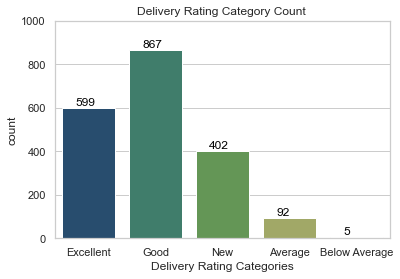

In [38]:
ax = sns.countplot(x='Delivery_rating_category', data=df, palette= 'gist_earth')
plt.title('Delivery Rating Category Count ')
plt.xlabel('Delivery Rating Categories')
plt.ylim(0,1000)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.2, p.get_height()+1), va='bottom', color='black')
plt.show()    

In [39]:
df[df['Delivery_rating_category']== 'Below Average']

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Address,Latitude,Longitude,Speciality,Feedback,Missing_Delivery_Rating,Cost_for_2,price_range_classification,Dining_rating_category,Delivery_rating_category
318,DEL - Roseate House,"European, North Indian, Italian, Desserts, Con...",3000,"Roseate House, Aerocity, New Delhi",4.3,971,2.8,16,"Roseate House, Asset 10, Hospitality District,...",28.550801,77.121595,NA,NA,0,2500-3000,Mid Range,Good,Below Average
807,Unlocked - Bar.Kitchen.Escape Room,"European, American, Italian, Continental, Dess...",1600,"32nd Avenue, NH8, Gurgaon, Gurgaon",4.1,324,2.9,16,"Unit 3, Ground Floor, 32nd Avenue, NH 8, Part ...",28.461628,77.049889,A restaurant offering a unique dining experien...,NA,0,1500-2000,Mid Range,Good,Below Average
1349,Social Affaire,"Continental, American, Italian, North Indian, ...",2100,"Karol Bagh, New Delhi",4.0,177,3,191,"17A/12, Ground Floor, Pusa Road, Near Metro Pi...",28.645167,77.190291,"Portions, Main Course, Great Food, Good Food, ...",NA,0,2000-2500,Mid Range,Good,Below Average
1741,Tandoori Garh,"Chinese, North Indian, Rolls",700,"Golf Course Extension, Gurgaon",3.9,120,3,48,"Ullahawas, Baharampur Naya, CRPF Road, Sector ...",28.406601,77.091501,"Good Portion Size, Good Wifi, Young Crowd, Ela...",NA,0,500-1000,Budget Friendly,Average,Below Average
1774,Darjeeling Fast Food,"Chinese, Fast Food, Momos",150,"NIT, Faridabad",3.9,197,3,789,"1540-A/33 Foot Road, S.G.M Nagar, Near Wakil K...",28.405336,77.287605,"Best Staff, Best in Service, Comforting Atmosp...",NA,0,cost<500,Budget Friendly,Average,Below Average


### The disparity between the dining ratings & delivery ratings must be worked out as 3 of the above restaurants are good mid range restaurants but the delivery ratings are below average with missing reviews.

# ***

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

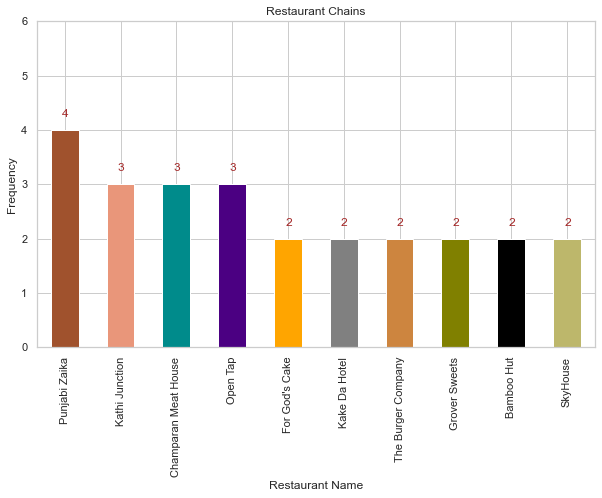

In [40]:
# Top 10 Restaurant chains
c = ['sienna', 'darksalmon', 'darkcyan', 'indigo', 'orange', 'grey','peru', 'olive', 'black','darkkhaki']
ax = df['Restaurant_Name'].value_counts()[:10].plot(kind='bar', figsize=(10,6), color=c)
plt.title('Restaurant Chains')
plt.xlabel('Restaurant Name')
plt.ylabel('Frequency')
plt.ylim(0,6)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.2, p.get_height()+0.2), va='bottom', color='brown')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

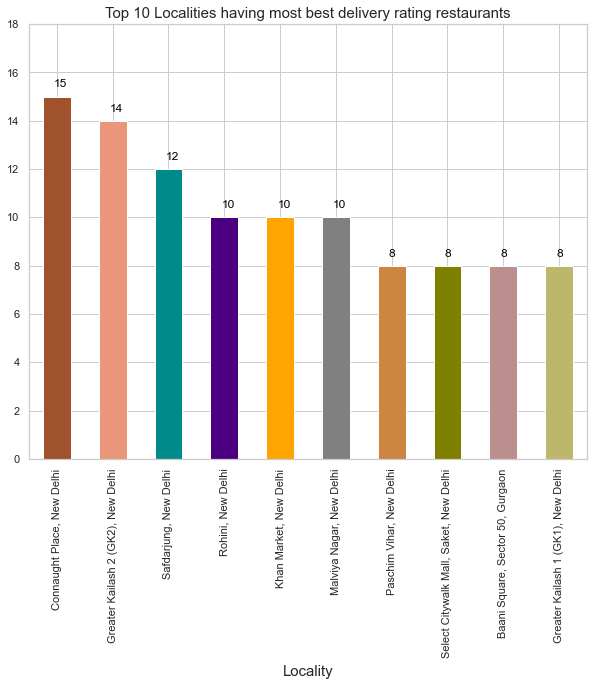

In [41]:
# Top 10 Localities having Best rated restaurants
r = df['Delivery_rating_category']=='Excellent'
c = ['sienna', 'darksalmon', 'darkcyan', 'indigo', 'orange', 'grey','peru', 'olive', 'rosybrown','darkkhaki', 'yellowgreen']
ax = df[r]['Locality'].value_counts()[:10].plot(kind='bar', figsize=(10,8), color=c)
plt.title('Top 10 Localities having most best delivery rating restaurants', fontsize=15)
plt.xlabel('Locality', fontsize=15)
plt.ylim(0,18)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.2, p.get_height()+0.3), va='bottom', color='black')
plt.show()    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

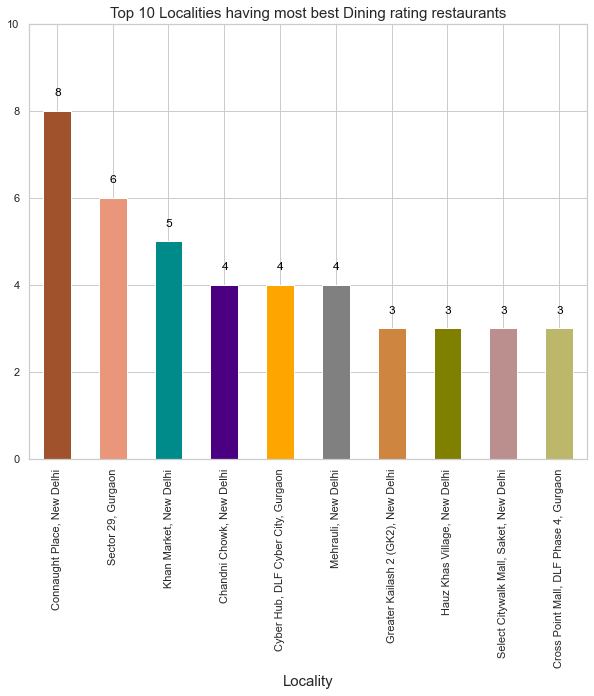

In [42]:
d = df['Dining_rating_category']=='Excellent'
c = ['sienna', 'darksalmon', 'darkcyan', 'indigo', 'orange', 'grey','peru', 'olive', 'rosybrown','darkkhaki', 'yellowgreen']
ax = df[d]['Locality'].value_counts()[:10].plot(kind='bar', figsize=(10,8), color=c)
plt.title('Top 10 Localities having most best Dining rating restaurants', fontsize=15)
plt.xlabel('Locality', fontsize=15)
plt.ylim(0,10)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.2, p.get_height()+0.3), va='bottom', color='black')
plt.show()

### Converting object features into lower case.

In [43]:
df['Address'] = df['Address'].apply( lambda x : x.lower())
df['Category'] = df['Category'].apply( lambda x : x.lower())

### Function to select restaurants based on 'user rating', 'food category' & 'location'.

In [44]:
def shortlist(Dining_Rating, Category, Address):
    return df[(df['Dining_Rating'] >= Dining_Rating) & (df['Category'].str.contains(Category)) & 
              (df['Address'].str.contains(Address))]['Restaurant_Name'].values

In [45]:
shortlist(3.9, 'south indian', 'dwarka')

array(['Fingerlickerz Bombaywala', 'Bowl King',
       'Evergreen Restaurant & Sweet House', 'Bikaner Express',
       'Swamy Dosa'], dtype=object)

### Re-ordering Columns

In [46]:
df.columns

Index(['Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count', 'Address', 'Latitude', 'Longitude',
       'Speciality', 'Feedback', 'Missing_Delivery_Rating', 'Cost_for_2',
       'price_range_classification', 'Dining_rating_category',
       'Delivery_rating_category'],
      dtype='object')

In [47]:
reordered_columns =['Restaurant_Name', 'Category', 'Locality','Address','Pricing_for_2','Cost_for_2',
                    'price_range_classification','Dining_Rating', 'Dining_Review_Count','Dining_rating_category',
                    'Delivery_Rating','Delivery_Rating_Count','Delivery_rating_category','Latitude', 'Longitude',
                    'Speciality', 'Feedback', 'Missing_Delivery_Rating']

In [48]:
df = df[reordered_columns]

In [49]:
# Restaurants in elite category
Elite_Restaurants = df[df['price_range_classification']=='Elite']
Elite_Restaurants.head()

,Restaurant_Name,Category,Locality,Address,Pricing_for_2,Cost_for_2,price_range_classification,Dining_Rating,Dining_Review_Count,Dining_rating_category,Delivery_Rating,Delivery_Rating_Count,Delivery_rating_category,Latitude,Longitude,Speciality,Feedback,Missing_Delivery_Rating
35,Threesixtyone Degrees - The Oberoi,"asian, continental, north indian, mughlai, des...","The Oberoi, Udyog Vihar, Gurgaon","443, phase 5, udyog vihar, gurgaon",5500,cost>5000,Elite,4.7,1019,Excellent,New,1,New,28.501983,77.086985,"Buffet, Chocolate Cake, Thai Curry, Salads, Vi...","Outside Deck, Poolside View, Sophisticated, Am...",1
44,Bukhara - ITC Maurya,"north indian, kebab","ITC Maurya, Chanakyapuri, New Delhi","itc maurya, chanakyapuri, new delhi",6500,cost>5000,Elite,4.6,4657,Excellent,New,0,New,28.598216,77.173647,"Sikanderi Raan, Meat Masala, Chicken Khurchan,...","Modern Vibe, Jazz Music, Sophisticated, Safe P...",1
49,Kiyan - The Roseate,"thai, european, north indian, pizza, salad","The Roseate, Kapashera, New Delhi","the roseate, 21st milestone, samalkha, nh 8, k...",5500,cost>5000,Elite,4.6,1124,Excellent,New,2,New,28.525118,77.100226,NA,NA,1
217,Ottimo At West View - ITC Maurya,"european, italian","ITC Maurya, Chanakyapuri, New Delhi","itc maurya, chanakyapuri, new delhi",6600,cost>5000,Elite,4.4,398,Good,New,0,New,28.598152,77.173709,"Exotic Salad, Risotto, Salmon, Sunday Brunch, ...","Sophisticated, Live Grill, Attentive Service, ...",1
228,Orient Express - Taj Palace,european,"Taj Palace, Chanakyapuri, New Delhi","taj palace, 2 sardar patel marg, chanakyapuri,...",8000,cost>5000,Elite,4.4,284,Good,New,0,New,28.595208,77.171727,"Get a complimentary night, earn up to 50% of s...",A romantic fine dining experience and varied E...,1


In [50]:
zomato_analysis = df.copy()

In [51]:
zomato_analysis.to_csv('Zomato_DelhiNCR_Restaurants_Analysis.csv', index=False)

In [52]:
%%HTML
<div class='tableauPlaceholder' id='viz1637481003422' style='position: relative'><noscript><a href='#'><img alt='Restaurants Classification on Map ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;De&#47;DelhiNCRRestaurantsclassification-streetview&#47;RestaurantsClassificationonMap&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DelhiNCRRestaurantsclassification-streetview&#47;RestaurantsClassificationonMap' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;De&#47;DelhiNCRRestaurantsclassification-streetview&#47;RestaurantsClassificationonMap&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1637481003422');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [53]:
%%HTML
<div class='tableauPlaceholder' id='viz1637476594177' style='position: relative'><noscript><a href='#'><img alt='Price Range Analysis ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;De&#47;DelhiNCRRestaurantsPriceRangeAnalysis&#47;PriceRangeAnalysis&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DelhiNCRRestaurantsPriceRangeAnalysis&#47;PriceRangeAnalysis' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;De&#47;DelhiNCRRestaurantsPriceRangeAnalysis&#47;PriceRangeAnalysis&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1637476594177');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### These maps gives insights about the regions like South West & North West Delhi have very limited restaurants and which price range restaurants should be incorporated in a particular region.